# Imported Library

Please import all necessary library that will be needed in this kernel here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

# Imported Dataset

Please import your dataset in pandas dataframe form. You can find the dataset in '../data/' directory. Don't forget to display the 5 top and size of dataset to give us initial idea about what kind dataset that we're going to analyze.

In [2]:
data_clu = pd.read_csv("data/CC GENERAL.csv")
data_clu.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


<hr>

# Domain Knowledge Analysis (optional)

Please state your domain knowledge to make a hypothesis (unproved) related to this case. To do this task, you are demanded to learn a little bit about study field which is related to this case.

<hr>

# Exploratory Data Analysis

Please do mind that what you will analyze in this section must be correlated or make sense to your model performance.

## Null value analysis

Please analyze how much null value that was contained in our dataset. You can choose your prefered method for null value handling but in default, you can choose one of three methods below:
1. fill them with median value,
2. drop rows that contain null value, or
3. drop columns that contain null value

You can review what you learned first to choose the best method for our dataset.

In [3]:
# Null value composition
data_clu.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [6]:
# Null value handling
data_clu = data_clu.dropna()

In [55]:
# data_clu.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Irregular value analysis

1. Please analyze if there are some irregular value that was contained in our dataset. 
2. Please refer to "Feature Explanations" to know the meaning of each features so you can identify if there is irregular value in one or more features. 
3. Value is irregular if it's different from valid distinct value set in a specific feature
4. Outlier is also considered to be irregular
5. Please explain the method that you use for irregular value handling.
6. Please seperate each cell for irregular value handling in each feature

<div style='color:red;font-weight:bold'>NB: You can skip this step if you feel there are no irregular values in our dataset</div>

In [9]:
data_clu.nunique()

CUST_ID                             8636
BALANCE                             8631
BALANCE_FREQUENCY                     42
PURCHASES                           6015
ONEOFF_PURCHASES                    3922
INSTALLMENTS_PURCHASES              4341
CASH_ADVANCE                        4206
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         203
PAYMENTS                            8636
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [10]:
data_clu.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [11]:
def hapusOut(data, kolom):
    q1 = data[kolom].quantile(0.25)
    q3 = data[kolom].quantile(0.75)
    IQR = q3 - q1
    batasBawah = q1 - (1.5*IQR)
    batasAtas = q3 + (1.5*IQR)
    data_fix = data[(data[kolom] > batasBawah) & (data[kolom] < batasAtas )]
    return data_fix

In [15]:
data_clu.describe().columns.drop('TENURE')

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT'],
      dtype='object')

In [16]:
data_clu.shape

(8636, 18)

In [18]:
# Irregular value handling feature 1
for i in data_clu.describe().columns.drop('TENURE'):
    data_clu = hapusOut(data_clu, i)

In [19]:
data_clu.shape

(2294, 18)

In [56]:
# data_clu.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Data type analysis

It's important to make sure that each feature already use correct data type. Please make sure all features already use correct data type based on whether the feature is categorical or numerical. Please change:
1. categorical feature into 'int64', and
2. numerical feature into 'float64'

In [20]:
# Data type display
data_clu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2294 entries, 0 to 8939
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           2294 non-null   object 
 1   BALANCE                           2294 non-null   float64
 2   BALANCE_FREQUENCY                 2294 non-null   float64
 3   PURCHASES                         2294 non-null   float64
 4   ONEOFF_PURCHASES                  2294 non-null   float64
 5   INSTALLMENTS_PURCHASES            2294 non-null   float64
 6   CASH_ADVANCE                      2294 non-null   float64
 7   PURCHASES_FREQUENCY               2294 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        2294 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  2294 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            2294 non-null   float64
 11  CASH_ADVANCE_TRX                  2294 non-null   int64  
 12  PURCHA

In [22]:
# Data type handling
data_clu = data_clu.drop('CUST_ID', axis= 1)

## Feature correlation analysis

The purpose of this section to find if there are possibility of multi-correlation between features and in the same time to get insight about which features (X) that have good correlation with our target (y).

### Heatmap correlation

Heatmap is one of simplest method to analyze feature correlation. Please do:
1. make heatmap correlation with only features (X) - we need to know correlation between features and avoid multi-correlation features,
2. make heatmap correlation with features (X) and target (y) - we need to know which features that have good correlation with our target,

You can select some good features only (highlighting) to make the plots clearer.

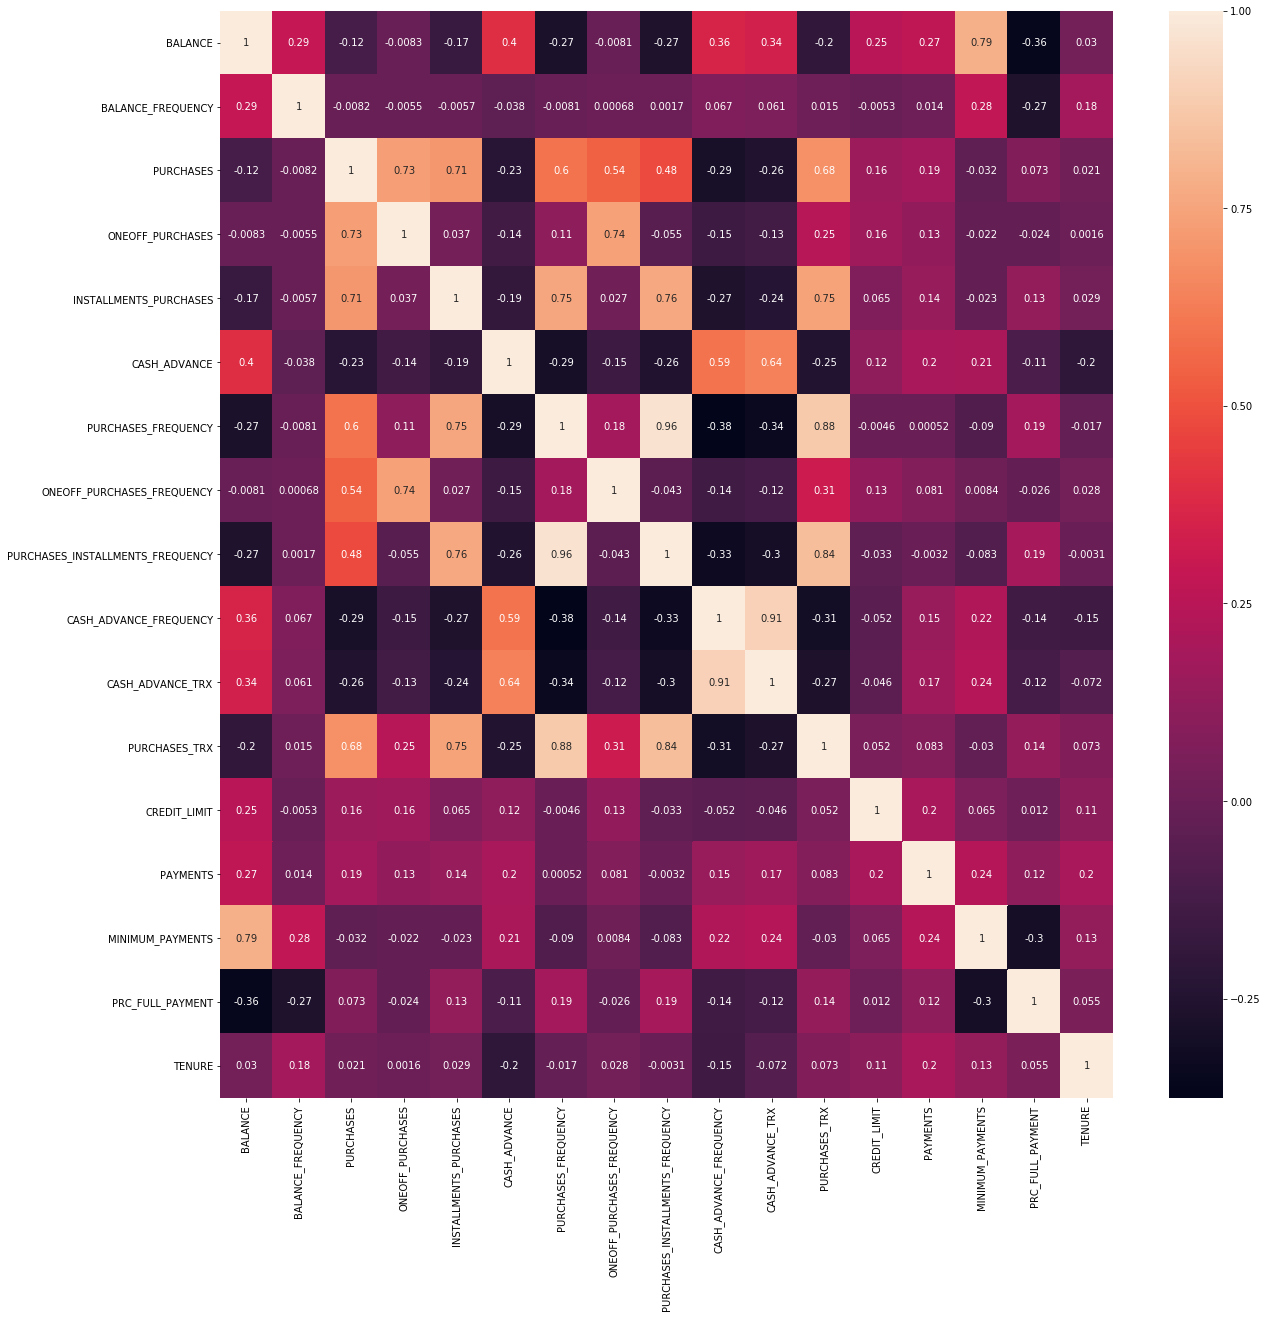

In [23]:
# Heatmap correlation with only features (X)
plt.figure(figsize=(20,20))
sns.heatmap(data_clu.corr(), annot=True)
plt.show()

## Distribution analysis

Please make:
1. distribution plot for each numerical feature - we need to know how is distribution shape for each numerical feature
2. histogram for each categorical feature - we need to know how is distribution for each distinct value in each feature

<div style='color:red'>
    <b>
        NB: Please do: <br>
        1. separate each feature's plot, and <br>
        2. give good title and good axis title for each plot
    </b>
</div>

### Distribution Plot for Numerical Feature

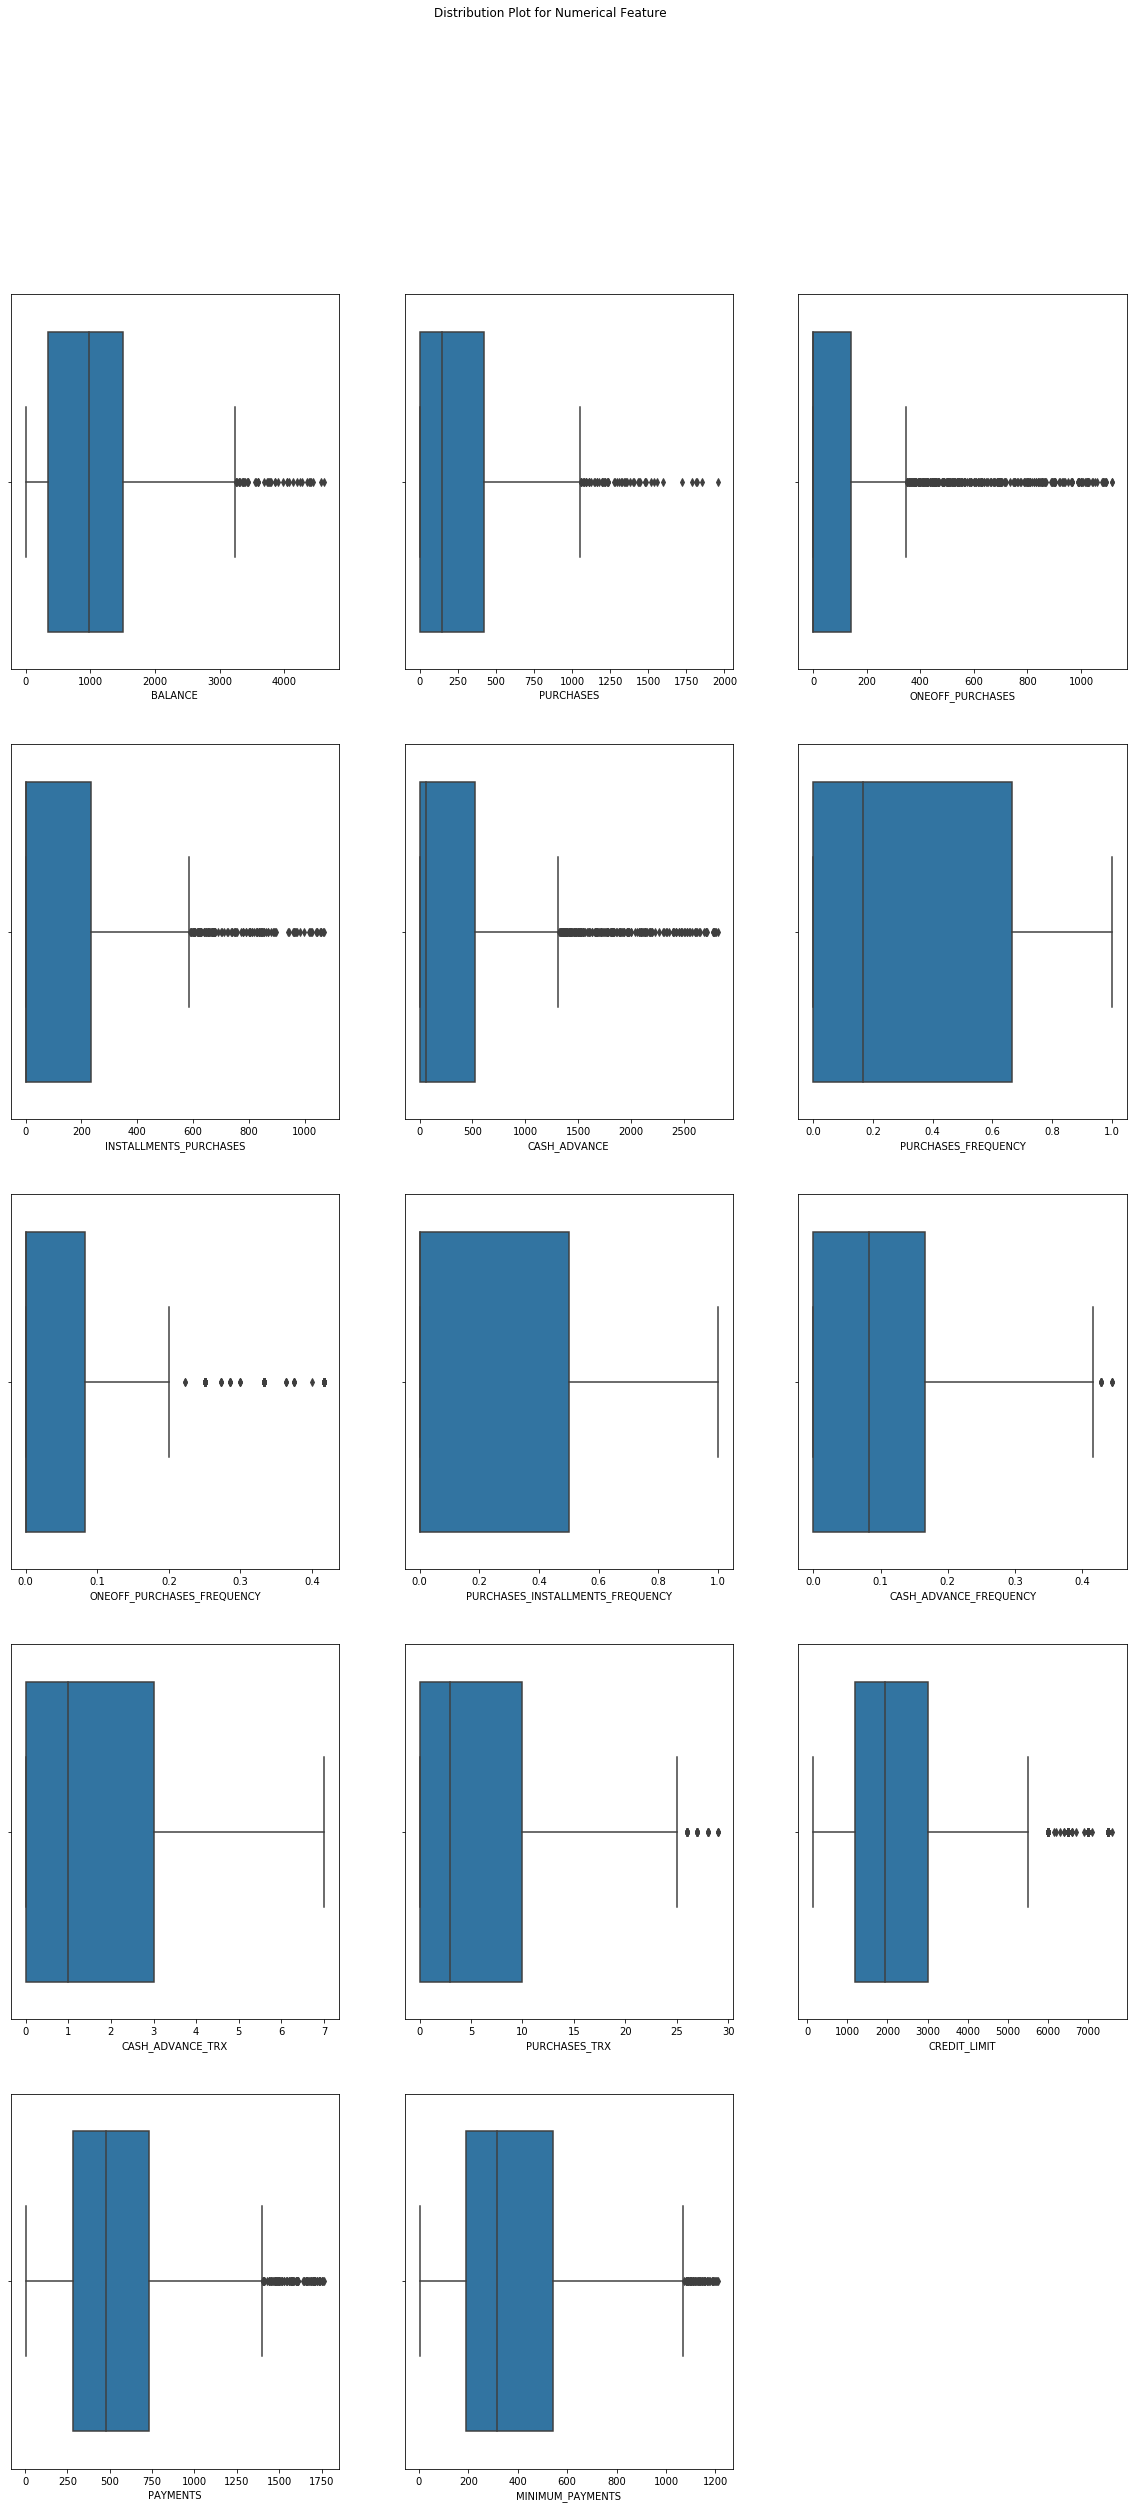

In [94]:
# Distribution analysis feature 1
numeric = data_clu.iloc[:,:-1].drop(['BALANCE_FREQUENCY', 'PRC_FULL_PAYMENT'], axis = 1)
col = numeric.columns
j = 0
plt.figure(figsize=(20,40))
plt.suptitle('Distribution Plot for Numerical Feature')
for i in col:
    j = j + 1
    plt.subplot(5,3,j)
    sns.boxplot(numeric[i])
plt.show()

In [95]:
# numeric.isnull().sum()

### Histogram Plot for Categorical Feature

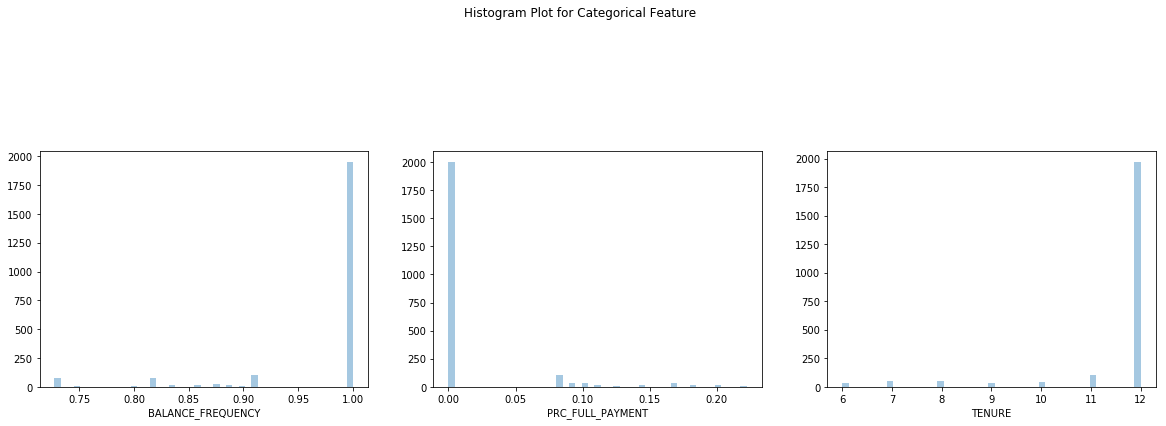

In [96]:
# Distribution analysis feature 2
category = data_clu[['BALANCE_FREQUENCY','PRC_FULL_PAYMENT','TENURE']]
col_cat = category.columns
k = 0
plt.figure(figsize=(20,20))
plt.suptitle('Histogram Plot for Categorical Feature')
for i in col_cat:
    k += 1
    plt.subplot(4,3,k)
    sns.distplot(category[i], kde = False)
plt.show()

In [97]:
category.isnull().sum()

BALANCE_FREQUENCY    0
PRC_FULL_PAYMENT     0
TENURE               0
dtype: int64

## Feature Selection & Engineering

Based on "Feature correlation analysis" & "Distribution analysis" you can throw away some unnecessary features or even you want to keep all features. Please do some handling about feature selection (selecting necessary features) and state your reason for such handling.

You can do feature engineering to make our dataset clearer such as dividing "date", "month", and "year" or you can add additional data from external source to help your analysis.

<p style='color:red'><b>NB: You can make more than one combination dataset, but please separate them in different variable.</b></p>

In [98]:
# Feature selection handling

In [99]:
# Feature engineering handling

<hr>

# Data Preprocessing

## Categorical data, numerical data, and target data separation

Please separate categorical data, numerical data, and target data into different variable to make us easier when do preprocessing.

In [100]:
data_cat = category
data_cat.head()

,BALANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
0,0.818182,0.0,12
4,1.000000,0.0,12
7,1.000000,0.0,12
8,1.000000,0.0,12
14,1.000000,0.0,12


In [101]:
data_cat.isnull().sum()

BALANCE_FREQUENCY    0
PRC_FULL_PAYMENT     0
TENURE               0
dtype: int64

In [102]:
data_num = numeric.copy()
data_num.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,40.900749,95.40,0.00,95.4,0.00000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787
4,817.714335,16.00,16.00,0.0,0.00000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237
7,1823.652743,436.20,0.00,436.2,0.00000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990
8,1014.926473,861.49,661.49,200.0,0.00000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409
14,2772.772734,0.00,0.00,0.0,346.81139,0.000000,0.000000,0.000000,0.083333,1,0,3000.0,805.647974,989.962866


In [103]:
data_num.isnull().sum()

BALANCE                             0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
dtype: int64

## Numerical data normalization

Please normalize our numerical data (if existed) using either "Standard Scaling" or "Min Max Scaling". You can make a new combination dataset by using both method.

In [104]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler_num = scaler.fit_transform(data_num)

In [105]:
data_num = pd.DataFrame(scaler_num, columns=data_num.columns)
data_num.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,0.008527,0.048741,0.000000,0.089234,0.00000,0.166667,0.000000,0.083333,0.000000,0.000000,0.068966,0.114094,0.112618,0.113697
1,0.177028,0.008175,0.014350,0.000000,0.00000,0.083333,0.199999,0.000000,0.000000,0.000000,0.034483,0.140940,0.383248,0.200853
2,0.395230,0.222858,0.000000,0.408007,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.413793,0.288591,0.383663,0.438644
3,0.219806,0.440142,0.593265,0.187073,0.00000,0.333333,0.199999,0.250000,0.000000,0.000000,0.172414,0.919463,0.388896,0.256461
4,0.601107,0.000000,0.000000,0.000000,0.12296,0.000000,0.000000,0.000000,0.187499,0.142857,0.000000,0.382550,0.455552,0.817735


In [106]:
data_num.isnull().sum()

BALANCE                             0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
dtype: int64

## Categorical data encoding

Please encode our categorical data (if existed) using either "One Hot Encoding" or "Label Encoding" based on each data characteristics.

## Target data preprocessing

Please preprocess our target data based on whether our target data is numerical or categorical. But if it's categorical, you can label encode it since some machine learning algorithm only receive output data in label encoded form.

<p style='color:red'><b>Clustering tidak ada data target</b></p>

## Combine all preprocessed data

Please combine preprocessed numerical data, preprocessed categorical data, and preprocessed target data into one variable. Don't forget to combine in different variable if you have more than one combination.

In [123]:
data_fix = data_num.join(category)

In [124]:
category.isnull().sum()

BALANCE_FREQUENCY    0
PRC_FULL_PAYMENT     0
TENURE               0
dtype: int64

In [125]:
data_fix.head()

,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,BALANCE_FREQUENCY,PRC_FULL_PAYMENT,TENURE
0,0.008527,0.048741,0.000000,0.089234,0.00000,0.166667,0.000000,0.083333,0.000000,0.000000,0.068966,0.114094,0.112618,0.113697,0.818182,0.0,12.0
1,0.177028,0.008175,0.014350,0.000000,0.00000,0.083333,0.199999,0.000000,0.000000,0.000000,0.034483,0.140940,0.383248,0.200853,NaN,NaN,NaN
2,0.395230,0.222858,0.000000,0.408007,0.00000,1.000000,0.000000,1.000000,0.000000,0.000000,0.413793,0.288591,0.383663,0.438644,NaN,NaN,NaN
3,0.219806,0.440142,0.593265,0.187073,0.00000,0.333333,0.199999,0.250000,0.000000,0.000000,0.172414,0.919463,0.388896,0.256461,NaN,NaN,NaN
4,0.601107,0.000000,0.000000,0.000000,0.12296,0.000000,0.000000,0.000000,0.187499,0.142857,0.000000,0.382550,0.455552,0.817735,1.000000,0.0,12.0


In [126]:
data_fix.isnull().sum()

BALANCE                                0
PURCHASES                              0
ONEOFF_PURCHASES                       0
INSTALLMENTS_PURCHASES                 0
CASH_ADVANCE                           0
PURCHASES_FREQUENCY                    0
ONEOFF_PURCHASES_FREQUENCY             0
PURCHASES_INSTALLMENTS_FREQUENCY       0
CASH_ADVANCE_FREQUENCY                 0
CASH_ADVANCE_TRX                       0
PURCHASES_TRX                          0
CREDIT_LIMIT                           0
PAYMENTS                               0
MINIMUM_PAYMENTS                       0
BALANCE_FREQUENCY                   1851
PRC_FULL_PAYMENT                    1851
TENURE                              1851
dtype: int64

In [127]:
data_fix.shape

(2294, 17)

<hr>

# Additional Analysis & Preprocessing (optional)

Please do share your method if you have additional analysis or preprocessing that was out of topics but still related to our dataset. This section and add additional point for this case.

<hr>

# Train Test Split

Please split our dataset into training data and testing data. Do not seperate features data (X) and target data (y) since we will export them after this section.

Please split all other datasets if you have more than one dataset combination.

<p style='color:red'><b>Clustering tidak ada Train Test Split</b></p>

# Exporting Dataset

Please export your dataset into '../data/preprocessed_data/train_data.csv' for training data and '../data/preprocessed_data/test_data.csv' for testing data and keep in mind to exclude dataframe index when exporting.

If you have more than one dataset combination make a counter in folder name such as 'preprocessed_data0', 'preprocessed_data1', 'preprocessed_data2', and keep on...

In [128]:
data_fix.to_csv('dataPreprocessed/clustering.csv', index=False)